# Introduction

In this notebook we demonstrate the use of **Word Embeddings (Word2Vec)** weighting technique into Information Retrieval to make trace link recovery between Test Cases and Bug Reports.

We model our study as follows:

* Each bug report title, summary and description compose a single query.
* We use each test case content as an entire document that must be returned to the query made

# Import Libraries

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np
import pprint

from modules.models_runner.feat_br_models_runner import Feat_BR_Models_Runner
from modules.utils import aux_functions
from modules.utils import model_evaluator as m_eval
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm
from modules.utils import br_feat_final_matrix_handler as b2f_handler

from matplotlib import pyplot as plt

import warnings; warnings.simplefilter('ignore')

# Load Datasets

In [2]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


# Running LSI Model - Exp-Vol UNION Oracle

In [3]:
models_runner_1 = Feat_BR_Models_Runner()

wv_model_1 = models_runner_1.run_word2vec_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)

sim_thresh = 0.0

wv_eval_t1 = evaluator_1.evaluate_model(model=wv_model_1, top_value=1, sim_threshold=sim_thresh)
wv_eval_t3 = evaluator_1.evaluate_model(model=wv_model_1, top_value=3, sim_threshold=sim_thresh)
wv_eval_t5 = evaluator_1.evaluate_model(model=wv_model_1, top_value=5, sim_threshold=sim_thresh)
wv_eval_t10 = evaluator_1.evaluate_model(model=wv_model_1, top_value=10, sim_threshold=sim_thresh)

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running W2V model -----
Expert and Volunteers Matrix UNION.shape: (91, 19)


# Similarity Matrix

In [4]:
aux_functions.highlight_df(wv_model_1.get_sim_matrix().iloc[0:23, 0:14])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,0.936612,0.960915,0.911715,0.895986,0.790089,0.960064,0.902209,0.961873,0.779323,0.713233,0.913877,0.908389,0.933124,0.772789
windows_child_mode,0.901049,0.945933,0.894297,0.898527,0.816999,0.932238,0.899086,0.934099,0.807661,0.728027,0.914614,0.900195,0.919369,0.788337
apz_async_scrolling,0.879576,0.929369,0.867827,0.885397,0.781568,0.949482,0.887306,0.946118,0.797899,0.704115,0.893986,0.884444,0.912214,0.773982
browser_customization,0.808218,0.794324,0.776821,0.781577,0.75625,0.784035,0.795127,0.771352,0.667656,0.671759,0.81421,0.802921,0.758186,0.698421
pdf_viewer,0.808188,0.78357,0.799777,0.812909,0.738792,0.823546,0.769369,0.82304,0.682603,0.671706,0.824717,0.818468,0.785043,0.690668
context_menu,0.939618,0.903422,0.908013,0.890005,0.803635,0.931826,0.892792,0.919826,0.769268,0.733383,0.913378,0.907109,0.898375,0.786784
w10_comp,0.903249,0.926826,0.877591,0.875666,0.805946,0.93268,0.891398,0.926375,0.767018,0.72615,0.917721,0.897878,0.900787,0.766711
tts_in_desktop,0.889628,0.898852,0.870645,0.871765,0.792676,0.908934,0.879206,0.906117,0.755797,0.722926,0.899604,0.87507,0.885207,0.767345
tts_in_rm,0.887032,0.894168,0.8698,0.87021,0.788861,0.907457,0.875424,0.895543,0.753827,0.720712,0.89781,0.864333,0.879585,0.768421


# Analysis of BR x Feat Generated Traces

In [5]:
handler = b2f_handler.BR_Feat_Final_Matrix_Handler(mode=b2f_handler.HandlerMode.LOAD)
br_2_features_matrix_final = handler.add_mappings_1(columns_names=['Features_IDs_wv_t1_m',
                                                                   'Features_IDs_wv_t3_m',
                                                                   'Features_IDs_wv_t5_m',
                                                                   'Features_IDs_wv_t10_m',
                                                                   'Features_IDs_orc'],
                                                    trace_matrices=[wv_eval_t1['trace_links_df'],
                                                                    wv_eval_t3['trace_links_df'],
                                                                    wv_eval_t5['trace_links_df'],
                                                                    wv_eval_t10['trace_links_df'],
                                                                    evaluator_1.get_oracle_df()],
                                                    is_from_model=True)

br_2_features_matrix_final = handler.add_mappings_2(dest_columns_names=['f_names_wv_t1',
                                                                        'f_names_wv_t3',
                                                                        'f_names_wv_t5',
                                                                        'f_names_wv_t10',
                                                                        'f_names_orc'],
                                                   orig_columns_names=['Features_IDs_wv_t1_m',
                                                                       'Features_IDs_wv_t3_m',
                                                                       'Features_IDs_wv_t5_m',
                                                                       'Features_IDs_wv_t10_m',
                                                                       'Features_IDs_orc'])
br_2_features_matrix_final.head(10)

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)
BR_2_Features Matrix Final.shape: (91, 5)


,bug_title,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,Features_IDs_wv_t1_m,Features_IDs_wv_t3_m,Features_IDs_wv_t5_m,Features_IDs_wv_t10_m,Features_IDs_orc,f_names_wv_t1,f_names_wv_t3,f_names_wv_t5,f_names_wv_t10,f_names_orc
Bug_Number,,,,,,,,,,,,,,,
1248267,"Right click on bookmark item of ""Recently Book...",6,6,6,6,6,1 6 7,1 2 6 7 19,1 2 3 6 7 8 9 12 14 19,6,[[context_menu]],"[[new_awesome_bar], [context_menu], [w10_comp]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...",[[context_menu]]
1248268,"Unable to disable ""Recently bookmarked""",,4,4,,1,1 2 19,1 2 3 7 19,1 2 3 6 7 8 12 14 17 19,4,[[new_awesome_bar]],"[[new_awesome_bar], [windows_child_mode], [fla...","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[[browser_customization]]
1257087,Middle mouse click on history item would not open,,,,,1,1 2 6,1 2 6 12 14,1 2 3 6 7 8 9 12 14 19,,[[new_awesome_bar]],"[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...",[]
1264988,Scrollbar appears for a moment in the new Awes...,1,1,1,1,2,1 2 6,1 2 3 6 19,1 2 3 6 7 8 9 12 14 19,1,[[windows_child_mode]],"[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[[new_awesome_bar]]
1267480,Intermittent browser/components/preferences/in...,,,,,2,2 6 7,2 6 7 14 19,1 2 3 6 7 8 9 13 14 19,,[[windows_child_mode]],"[[windows_child_mode], [context_menu], [w10_co...","[[windows_child_mode], [context_menu], [w10_co...","[[new_awesome_bar], [windows_child_mode], [apz...",[]
1267501,New Private Browsing start-page overflows off ...,3,,3,,1,1 3 12,1 2 3 7 12,1 2 3 6 7 8 9 12 14 19,3,[[new_awesome_bar]],"[[new_awesome_bar], [apz_async_scrolling], [po...","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1269348,Show last sync date tooltip on Synced Tabs sid...,,,,,1,1 2 6,1 2 3 6 7,1 2 3 6 7 8 9 12 14 19,,[[new_awesome_bar]],"[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[]
1269485,New Private Browsing start-page has white/gray...,3,,3,,1,1 2 3,1 2 3 7 12,1 2 3 6 7 8 12 14 17 19,3,[[new_awesome_bar]],"[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1270274,Intermittent browser_share.jsuncaught exceptio...,,,,,2,2 3 17,1 2 3 17 19,1 2 3 6 7 8 12 14 17 19,,[[windows_child_mode]],"[[windows_child_mode], [apz_async_scrolling], ...","[[new_awesome_bar], [windows_child_mode], [apz...","[[new_awesome_bar], [windows_child_mode], [apz...",[]


# Analysis of Precision and Recall

## Union Strategy

Evaluating WORDVECTOR Model ----- 


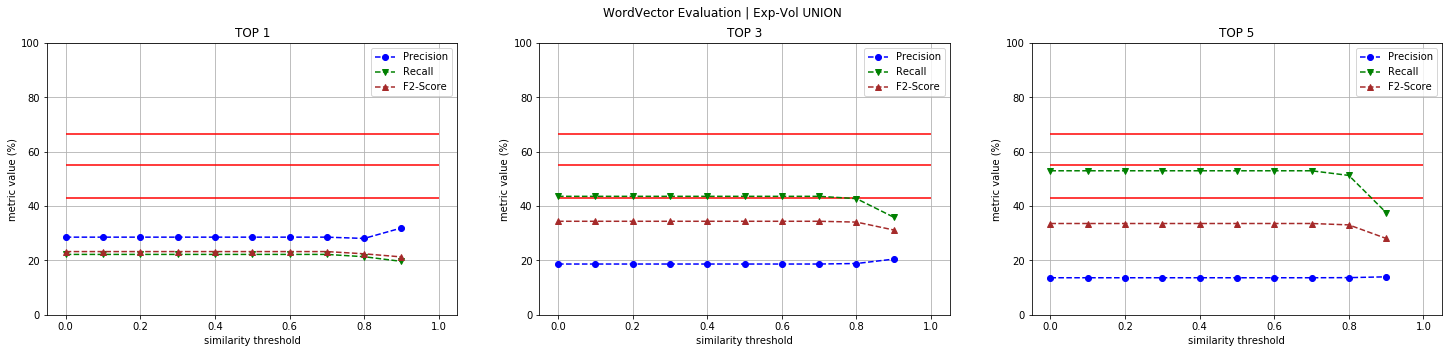

In [6]:
results_1 = evaluator_1.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_1.plot_evaluations_2(title='WordVector Evaluation | Exp-Vol UNION', results=results_1, model_name='wordvector')

## Intersection Strategy

Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
Evaluating WORDVECTOR Model ----- 


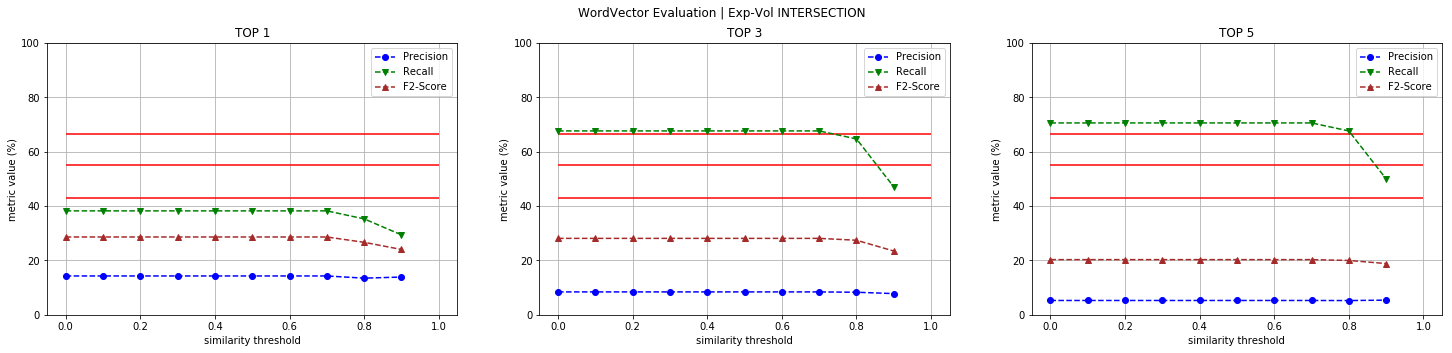

In [7]:
evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df().T)
results_2 = evaluator_2.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_2.plot_evaluations_2(title='WordVector Evaluation | Exp-Vol INTERSECTION', results=results_2, model_name='wordvector')

## Expert-Only Strategy

Feat_BR Expert Matrix shape: (91, 19)
Evaluating WORDVECTOR Model ----- 


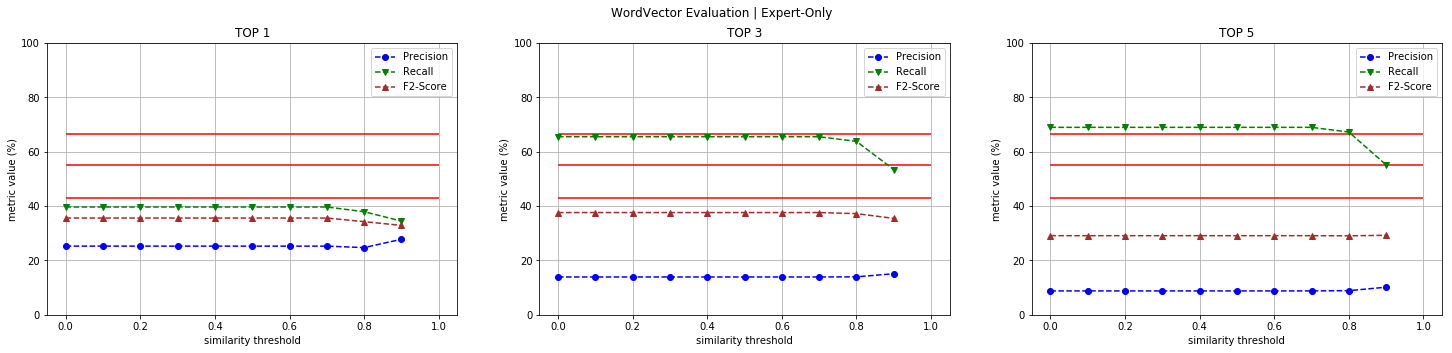

In [8]:
evaluator_3 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_df().T)
results_3 = evaluator_3.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_3.plot_evaluations_2(title='WordVector Evaluation | Expert-Only', results=results_3, model_name='wordvector')

## Volunteers-Only Strategy

Feat_BR Volunteers Matrix shape: (91, 19)
Evaluating WORDVECTOR Model ----- 


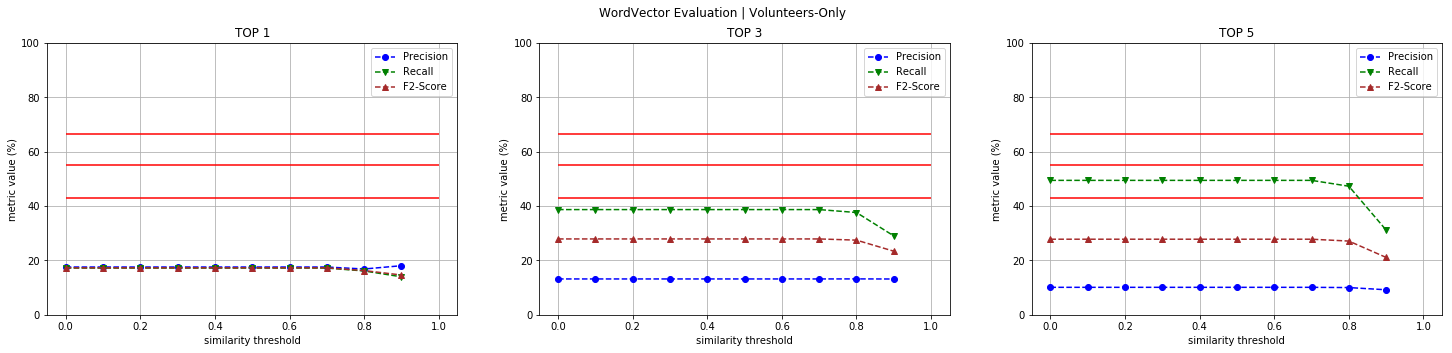

In [9]:
evaluator_4 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_volunteers_df().T)
results_4 = evaluator_4.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_4.plot_evaluations_2(title='WordVector Evaluation | Volunteers-Only', results=results_4, model_name='wordvector')

### Means of Metrics

Considering **TOP** values (1,3,5) and **SIMILARITY THRESHOLDS** values range(0.0,0.9)

In [10]:
print("Mean Precision: {:2.3}".format(np.mean(results_4.perc_precision)))
print("Mean Recall: {:2.3}".format(np.mean(results_4.perc_recall)))
print("Mean F-Score: {:2.3}".format(np.mean(results_4.perc_fscore)))

Mean Precision: 13.6
Mean Recall: 33.9
Mean F-Score: 23.8
